<h1 style="direction: rtl"> <b> תרגיל בית 2 חלק 2: רקורסיה ומשוואות דיפרנציאליות במודלים של אוכלוסייה </b>
</h1>

<div dir="rtl">בתירגול 4, פיתחנו פונקציה של "פותר" <code>solve_recursion</code> המסוגלת לפתור באופן כללי כל משוואת רקורסיה, ופונקציה נוספת <code>plot_cobweb</code> שלוקחת את הפתרון ומציירת את ה-cobweb plot המתאים.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### The functions ####

In [2]:
def solve_recursion(f: callable, t_span: (int, int)=(0,1), y0: np.array or float=1)->np.array:
    """Solve the recurrence y(t+1)=f(t,y(t)) in t_span=(t0,tf) starting at y(t0)=y0. Return solution array y[0:tf-t0+1, ...]."""
    y0 = np.array(y0)
    t0, tf = t_span

    t = np.arange(t0, tf+1)
    y = np.zeros((len(t), *y0.shape))
    y[0,...]=y0

    for i in range(len(t)-1):
        y[i+1,...] = f(t[i,...],y[i,...])
    return y

<div dir="rtl"> הפותר מקבל פונקציה (רגילה עם <code>def</code> או אנונימית <code>lambda t,y:</code>), רשומה (tuple) של הזמן ההתחלתי והסופי <code>(t0,tf)</code> ותנאי התחלה <code>y0</code> ומחזירה את הפתרון של משוואת הרקורסיה: <code>y = [y0, f(t0,y0), f(t0+1,y1), f(t0+2,y2)...)]</code>. ראו דוגמא בסוף המחברת</div> 

<div dir="rtl"> את פונקציית ה-<code>plot_recursion</code> פיצלנו לארבעה תת פונקציות: 

In [10]:
def plot_cobweb(N, f):
    """Plot a cobweb plot of the solution N to the function f(t,y)."""

    # plot y=x helper line and plot the cobweb
    plt.axline( (0,0),(1,1), linestyle='--',color='k') # y=x

    x, y = cobweb_line(N)
    plt.plot(x,y, **kwargs)

    # create equal axis (to taste)
    plt.axis('scaled')

    clamp_to_1st_quadrant()

    # draw the function across the figure
    plot_func_across_x(lambda x: f(0,x))

    frame_cobweb(labels=r'$N\left(t\right)$')

<div dir="rtl"> <code>cobweb_line(N)</code> לוקחת את הפתרון (אוכלוסייה בזמן) <code>n</code> ומחזירה את ה-x וה-y של קו ה-cobweb שלו<code>x=[n0,n0,n1...],y=[0,n1,n1,n2...]</code>

In [4]:
def cobweb_line(N):
    """"Extract the cobweb line (N0,0)-(N0,N1)-(N1,N1)- from N."""
    x = np.zeros(2*len(N)-1)
    y = np.zeros(2*len(N)-1)
    x[::2] = N
    x[1::2] = N[:-1]
    y[1::2] = N[1:]
    y[2::2] = N[1:]
    return x,y

<div dir="rtl"> <code>plot_func_across_x(f)</code> מציירת את הגרף לפונקציה <code>f</code> בין גבולות ציר ה-x     (<code>plt.xlim</code>)

In [6]:
def plot_func_across_x(f):
    """Plot the function f(x) across the x axis"""
    x_min, x_max = plt.xlim()
    x_func = np.linspace(x_min, x_max)
    y_func = f(x_func)
    plt.plot(x_func,y_func,'k')
    # restore the original limits
    plt.xlim(x_min,x_max)

## <div style="direction: rtl"> <b> שאלה ראשונה: מודלים של אוכלוסייה ברקורסיה </b> </div> ##

<div dir="rtl"> ראינו שלושה מודלים בשאלה 2 בחלק הראשון: <ul><li>מודל תטא-לוגיסטי theta-logistic model:</li></ul> </div>

$$ N\left(t+1\right) = \lambda N\left(t\right)\left(1-\left(\frac{N\left(t\right)}{K}\right)^\theta\right) $$

<div dir="rtl"> <ul><li>מודל ריקר Ricker model:</li></ul> </div>

$$ N\left(t+1\right) = \lambda N\left(t\right)e^{-\alpha N\left(t\right)} $$

<div dir="rtl"> <ul><li>מודל בוורטון הולט Beverton-Holt model:</li></ul> </div>

$$ N\left(t+1\right) = \lambda N\left(t\right)\frac{1}{1+\alpha N\left(t\right)} $$

<div dir="rtl"><b>א.</b> פתרו את המודל התטא-לוגיסטי בעזרת הפותר <code>solve_recursion</code> מאוכלוסייה ראשונית של 800 פרטים ל-15 דורות עם הפרמטרים: </div>

1.  $\lambda=0.9$, $\theta=1.2$, $K=2,000$  
2.  $\lambda=1.8$, $\theta=1.2$, $K=2,000$  
3.  $\lambda=1.8$, $\theta=1.9$, $K=2,000$  
4.  $\lambda=1.8$, $\theta=2.8$, $K=2,000$

<div dir="rtl">עבור כל סט פרמטרים, שרטטו את הגרף של גודל האוכלוסייה כפונקציה של הזמן ואת ה-cobweb plot. 

In [ ]:
# your solution here

<div dir="rtl"><b>ב.</b> פתרו את מודל ריקר בעזרת הפותר <code>solve_recursion</code> מאוכלוסייה ראשונית של 800 פרטים ל-15 דורות, עם פרמטרים 

$$\alpha=\frac{1}{2000}$$

$$ \lambda = 0.9, 1.8, 4.8, 8.0$$

<div dir="rtl"> בתא אחד, ציירו את גודל האוכלוסייה בזמן לכל ארבעת הלמדבאות בגרף אחד, ובתא נוסף ציירו את ה-cobweb plot של האוכלוסייה לכל ארבעת הלמדבאות בגרף אחד  

<div dir="rtl"><b>ג.</b> פתרו את מודל בוורטון-הולט בעזרת הפותר <code>solve_recursion</code> מאוכלוסייה ראשונית של 800 פרטים ל-15 דורות, עם פרמטרים 

$$\alpha=\frac{1}{2000}$$

$$ \lambda = 0.9, 1.8, 4.8, 8.0$$

<div dir="rtl"> עשו סעיף זה בדומה לסעיף הקודם (עם ריקר). מה ההבדל האיכותי בין הפתרונות שמתקבלים עם מודל ריקר לעומת הפתרונות שמתקבלים עם מודל בוורטון-הולט?

In [12]:
# your code here

# may take many cells!

<h3 dir="rtl"> הדרכה</h3>

<div dir="rtl"> השתמשו בפונקציות <code>solve_recursion</code> ו-<code>plot_cobweb</code> במקרים הברורים. כשצריך לצייר כמה cobweb באותו גרף, עדיף לעבוד עם תת-הפונקציות <code>cobweb_line</code>, <code>plot_func_across_x</code>,<code>frame_cobweb</code>, ו-<code>clamp_to_1st_quadrent</code>.<br> הסתכלו בתוך <code>plot-cobweb</code>: האם אפשר להפעיל כל תת פונקציה בלולאה עבור כל למבדא? האם הסדר של <code>clamp_to_1st_quadrant</code> חשוב? מה צריך להכניס ל-<code>frame_cobweb</code>? 

<div dir="rtl"> כשיש דברים עם שמות דומים למילים שמורות בפייתון, נהוג לשים מקף תחתון _ אחרי השם: </div>

```python
lambdas = [0.9, 1.8, 4.8, 8.0]
for lambda_ in lambdas:
    # do something with lambda
    plt.plot(0,0,label=fr'$\lambda={lambda_}$')
plt.legend()
```

####  דוגמאות לשימוש בפונקציות ####

<div dir="rtl">דוגמא לשימוש ב-<code>solve_recursion</code>:</div>

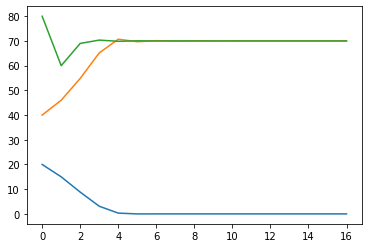

In [3]:
def quadratic_allee_rec(t,n):
    """A reucrsion equivalent to the quadratic equation with allee effect.
    
    we have +n, since a differential equation is like a difference equation.
    dN/dt -> delta N -> N(t+1)-N(t), so we need to add N to the other side
    """
    r=0.2
    a=1/2_000
    b=50
    return n+n*(r-a*(n-b)**2)

# or the same with a lambda function
# quadratic_allee_rec = lambda t, n: n+n*(0.2-(1/2_000)*(n-50)**2)
initial_conditions = [20, 40, 80]
for n0 in initial_conditions:
    N = solve_recursion(quadratic_allee_rec, (0,16), n0)
    plt.plot(N)
plt.show()

<div dir="rtl">דוגמא לשימוש ב-<code>cobweb_line</code></div>

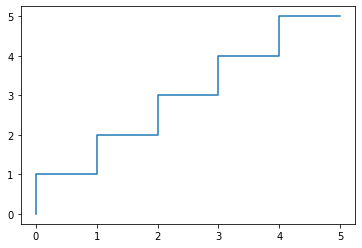

In [5]:
x,y = cobweb_line([0,1,2,3,4,5])
plt.plot(x,y)
plt.show()

<div dir="rtl"> דוגמא לשימוש ב-<code>plot_func_across_x</code>: נצייר את פונקציית ההתפלגות הנורמלית (שמוגדרת ממינוס אינסוף לאינסוף) על היסטוגרמה קיימת.</div>

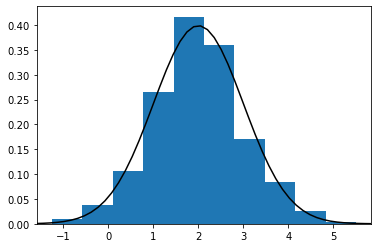

In [7]:
# create histogram of 1000 normal-distrubuted values
rng = np.random.default_rng(88223434)
mu, sigma = 2,1
plt.hist(rng.normal(mu,sigma,1000),density=True)

# pdf function
norm_func = lambda x: np.exp(-0.5*( (x-mu)/sigma )**2)/np.sqrt(2*np.pi*sigma**2)

# use our new function to overlay the pdf on the histogram
plot_func_across_x(norm_func)
plt.show()

<div dir="rtl">דוגמא לשימוש ב-<code>cobweb_frame</code> ו-<code>clamp_to_1st_quadrant</code>: נצייר מעגל ממורכז ב-0 ונוסיף שלושה תוויות ל-frame</div>

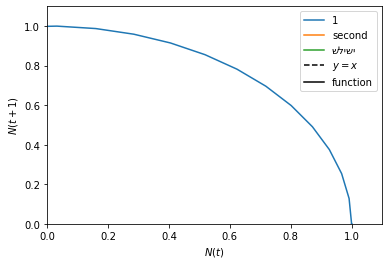

In [9]:
# plot a circle at the origion
theta=np.linspace(0,2*np.pi)
plt.plot(np.cos(theta),np.sin(theta))

# use our function to clamp the quadrant
clamp_to_1st_quadrant()

# add the cobweb frame
frame_cobweb(['1','second','שלישי'])

<div dir="rtl"> דוגמא לשימוש ב-<code>plot_cobweb</code></div>

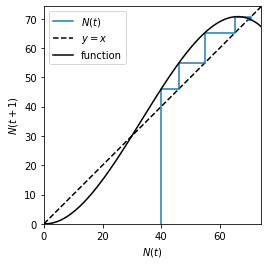

In [11]:
N = solve_recursion(quadratic_allee_rec, (0,16), 40)
plot_cobweb(N,quadratic_allee_rec)
plt.show()